# おまけ：講義中に作成したデータのソースコード

In [4]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# デフォルトのスタイルシートの変更
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'

# 日本語文字化け対策
fontnames = [os.path.basename(fm.FontProperties(fname=f).get_name()) for f in fm.findSystemFonts()]
selected = list(filter(lambda x: 'IPAGothic' in x or 'TakaoGothic' in x or 'Osaka' in x, fontnames))

if len(selected) == 0:
    print('ERROR! Install Japanese font beforehand')
else:
    plt.rcParams['font.family'] = selected[0]

## 一様分布

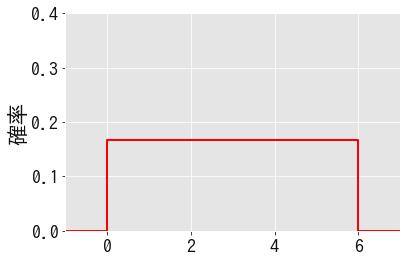

In [5]:
X = np.arange(-10, 10, 1)
Y = np.zeros(len(X))
Y[(X > 0) * (X <= 6)] = 1/6
plt.figure()
plt.rcParams["font.size"] = 18
plt.step(X, Y, c="r", linewidth=2)
plt.xlim(-1, 7)
plt.ylim(0, 0.4)
plt.ylabel("確率")
plt.show()

## ガウス分布

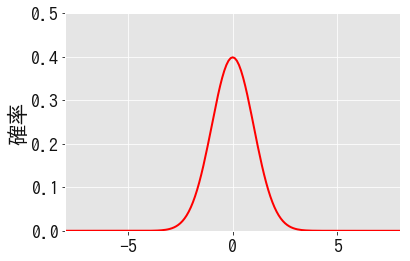

In [6]:
def gaussian(X, mu=0.0, sigma2=1.0):
    return np.exp(-((X - mu) ** 2)/(2 * sigma2)) / np.sqrt(2*np.pi*sigma2)

X = np.arange(-10, 10, 0.1)
Y = gaussian(X, 0.0, 1.0)
plt.figure()
plt.rcParams["font.size"] = 18
plt.plot(X, Y, c="r", linewidth=2)
plt.xlim(-8, 8)
plt.ylim(0, 0.5)
plt.ylabel("確率")
plt.show()

## 誤差関数の可視化 (フォーマルな書き方を使用)

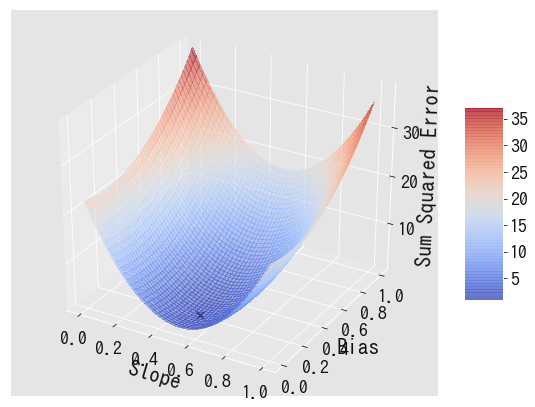

In [10]:
# 直線に対する線形回帰 (実践演習1)
nb_train = 50
rnd = np.random.RandomState(1701)

# 訓練データ
train_x = np.linspace(-3, 3, nb_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))
X = np.stack((train_x, np.ones(len(train_x))), axis=1)

# ここでは正解を与える (解くのは演習)
theta = [ 0.51640697, 0.18726988]

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

## 傾きとバイアスを変化させて、それぞれの誤差を計算
Xc = np.linspace(0, 1, 100)
Yc = np.linspace(0, 1, 100)
Xc, Yc = np.meshgrid(Xc, Yc)
Z = [[ np.sum((np.dot(X, [x, y]) - train_y) ** 2) / 2 for x, y in zip(Xl, Yl)] for Xl, Yl in zip(Xc, Yc)]

# 描画
surf = ax.plot_surface(Xc, Yc, Z, cmap=cm.coolwarm,
                       linewidth=0, alpha=0.5, antialiased=False)
ax.scatter(theta[0], theta[1], np.sum((np.dot(X, theta) - train_y) ** 2) / 2, c="k", marker="x", s=48)

# 整形
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel("Slope")
ax.set_ylabel("Bias")
ax.set_zlabel("Sum Squared Error")

# カラーバーを追加
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()